In [278]:
import sys, os
import time, pickle
sys.path.append("/Users/chilpert/Dev/pyproteinsExt/src")
sys.path.append("/Users/chilpert/Dev/pyproteins/src")
import pyproteinsExt.topology as topology
import seaborn as sns
from matplotlib import pyplot as plt
import re
import pandas as pd
from ete3 import NCBITaxa,TreeStyle,NodeStyle
from sklearn import mixture
from scipy import stats
import numpy as np
import math
from scipy import stats
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [279]:
def save(data, tag=None):
    saveDir="/Volumes/arwen/mobi/group/NOX_clean/pickle_saved"
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fTag = "NOX_annotation_" + tag + "_" if tag else "NOX_annotation_"
    fSerialDump = fTag + timestr + ".pickle"
    with open(saveDir + '/' + fSerialDump, 'wb') as f:
        pickle.dump(data, f)
    print('data structure saved to', saveDir + '/' + fSerialDump)

def load(fileName):
    saveDir="/Volumes/arwen/mobi/group/NOX_clean/pickle_saved"
    print(saveDir+"/"+fileName)
    d = pickle.load( open(saveDir + "/" + fileName, "rb" ) )
    print("restore a annotated container of ", len(d), "elements")
    return d

### Group repartition

In [116]:
from ete3 import faces

In [117]:
group1=data_no_fad_overlap
group1_taxids=[e.taxo.taxid for e in group1]
group2=nad_in_last_helix
group2_taxids=[e.taxo.taxid for e in group2]
group3=nad_in_last_loop
group3_taxids=[e.taxo.taxid for e in group3]
group4=data_fad_no_nad_overlap
group4_taxids=[e.taxo.taxid for e in group4]

In [118]:
dic_freq_taxids={}
for e in data : 
    if e.taxo.taxid not in dic_freq_taxids: 
        dic_freq_taxids[e.taxo.taxid]=[]
    dic_freq_taxids[e.taxo.taxid].append(e)

In [163]:
ncbi=NCBITaxa()
taxids=[e.taxo.taxid for e in data][:10]


In [164]:
ts = TreeStyle()
ts.show_leaf_name= False
ts.mode="c"

In [165]:
def mylayout(node):
    if node.get_descendants():
        text=faces.TextFace(node.sci_name,fsize=20)
        faces.add_face_to_node(text,node,column=0,position="branch-top")
    if node.is_leaf():
        if hasattr(node,"subnodes"):
            text=faces.TextFace(node.parent+";"+str(len(node.subnodes))+" taxids",fsize=20)
        else:    
            text=faces.TextFace(node.sci_name+";"+str(node.nb_appear)+" proteins",fsize=20)
        faces.add_face_to_node(text, node, column=0)    
ts.layout_fn=mylayout     

In [166]:
all_tree=ncbi.get_topology(taxids)
for n in all_tree.traverse("postorder"):
    n.nb_appear=taxids.count(n.name)
    nstyle = NodeStyle()
    n.group=None
    if n.name in group1_taxids: 
        n.group="group1"
    if n.name in group2_taxids: 
        nstyle["hz_line_color"]="blue"
        n.group="group2"
    if n.name in group3_taxids:
        nstyle["hz_line_color"]="green"
        n.group="group3"
    if n.name in group4_taxids:
        nstyle["hz_line_color"]="red"    
        n.group="group4"
    childs=n.get_descendants()
    if childs:
        group1_perc=len([c for c in childs if c.group=="group1"])/len(childs)
        group2_perc=len([c for c in childs if c.group=="group2"])/len(childs)
        group3_perc=len([c for c in childs if c.group=="group3"])/len(childs)
        group4_perc=len([c for c in childs if c.group=="group4"])/len(childs)
        perc_list=[group1_perc,group2_perc,group3_perc,group4_perc]
        maximum=max(perc_list)
        max_index=perc_list.index(maximum)
        if max_index==0:
            nstyle["fgcolor"]="black"
        elif max_index==1:
            nstyle["fgcolor"]="blue"
            print("G2",n.sci_name,n.rank, group2_perc)
        elif max_index==2:
            nstyle["fgcolor"]="green"
            print("G3",n.sci_name,n.rank,group3_perc)
        elif max_index==3:
            nstyle["fgcolor"]="green"
            print("G4",n.sci_name,n.rank,group4_perc)
    n.set_style(nstyle)  

In [187]:
all_tree.show(tree_style=ts)

In [184]:
def get_json(node):
    json={'name':node.sci_name,"group":"1"}
    if node.children:
        json["children"]=[]
        for ch in node.children:
            json["children"].append(get_json(ch))
    return json         

In [185]:
test=get_json(all_tree)

In [186]:
print(test)

{'name': 'Bacteria', 'group': '1', 'children': [{'name': 'Proteobacteria', 'group': '1', 'children': [{'name': 'Alcaligenaceae', 'group': '1', 'children': [{'name': 'Bordetella trematum', 'group': '1'}, {'name': 'Alcaligenes faecalis subsp. phenolicus', 'group': '1'}]}, {'name': 'Enterovibrio norvegicus', 'group': '1'}, {'name': 'Desulfobacteraceae bacterium CG2_30_51_40', 'group': '1'}, {'name': 'Kaistia soli DSM 19436', 'group': '1'}]}, {'name': 'Actinobacteria', 'group': '1', 'children': [{'name': 'Streptomyces sp. WM6378', 'group': '1'}, {'name': 'Frankia canadensis', 'group': '1'}, {'name': 'Actinopolymorpha cephalotaxi', 'group': '1'}]}, {'name': 'bacterium BMS3Abin04', 'group': '1'}, {'name': 'Leptospira barantonii', 'group': '1'}]}


In [179]:
all_tree.write(format=1,outfile="/Users/chilpert/test_tree.nw")

In [178]:
test={}
for n in all_tree.traverse():
    print(n.sci_name)
    test['name']=n.sci_name
    test["parent"]="null"
    if n.children: 
        test["children"]={}
        for c in n.children: 
            
    break

Bacteria
O


In [135]:
all_tree.render("/Users/chilpert/test_tree.pdf",tree_style=ts)

{'nodes': [[8389.77623525884,
   7464.938129639493,
   8399.136568779542,
   7474.298463160197,
   0,
   None],
  [7268.816416451829,
   6966.251284039239,
   7278.5973808513845,
   6976.032248438794,
   1,
   None],
  [7349.695750329345,
   10033.429742247505,
   7358.72078757733,
   10042.45477949549,
   2,
   None],
  [8747.61420804557,
   10783.596057344343,
   8756.07877106573,
   10792.060620364502,
   3,
   None],
  [10143.331952389348,
   10882.255601852024,
   10153.118648309335,
   10892.04229777201,
   4,
   None],
  [12195.908873118622,
   8774.496978727477,
   12203.967841274123,
   8782.555946882978,
   5,
   None],
  [12915.841924126831,
   8644.252000184948,
   12923.597859025582,
   8652.007935083699,
   6,
   None],
  [13641.54216820141,
   8208.005411377675,
   13648.692173666106,
   8215.155416842372,
   7,
   None],
  [14337.604942584945,
   8088.732562885603,
   14342.604942584945,
   8093.732562885603,
   8,
   None],
  [14337.348712664472,
   8142.864891188755,


In [162]:
json_tree={}
c=0
for n in all_tree.traverse():
    c+=1
    print(n.sci_name)
    if not n.is_root():
        first_ancestor=n.get_ancestors()[0]
        print("ANC",first_ancestor.sci_name)
        if first_ancestor != previous_ancestor: 
            print("CHANGE LEVEL")
        
    previous_ancestor=first_ancestor    
    if c==50:
        break

cellular organisms
Bacteria
ANC cellular organisms
CHANGE LEVEL
Archaea
ANC cellular organisms
Terrabacteria group
ANC Bacteria
CHANGE LEVEL
Proteobacteria
ANC Bacteria
unclassified Bacteria
ANC Bacteria
FCB group
ANC Bacteria
PVC group
ANC Bacteria
Spirochaetes
ANC Bacteria
unclassified Elusimicrobia
ANC Bacteria
unclassified Acidobacteria (miscellaneous)
ANC Bacteria
Leptotrichia sp. oral taxon 879 str. F0557
ANC Bacteria
DPANN group
ANC Archaea
CHANGE LEVEL
Euryarchaeota archaeon
ANC Archaea
Actinobacteria
ANC Terrabacteria group
CHANGE LEVEL
Firmicutes
ANC Terrabacteria group
Tenericutes
ANC Terrabacteria group
Cyanobacteria/Melainabacteria group
ANC Terrabacteria group
Chloroflexi
ANC Terrabacteria group
Gammaproteobacteria
ANC Proteobacteria
CHANGE LEVEL
delta/epsilon subdivisions
ANC Proteobacteria
Alphaproteobacteria
ANC Proteobacteria
Betaproteobacteria
ANC Proteobacteria
Candidatus Muproteobacteria
ANC Proteobacteria
Proteobacteria bacterium
ANC Proteobacteria
Bdellovibrional

In [88]:
for n in all_tree.traverse("preorder"):
    if n.get_descendants():
        collapse=True
        childs=n.get_descendants()
        for c in childs:
            if not c.is_leaf():
                collapse=False
                continue
        if collapse: 
            first_child=childs[0]
            other_childs=childs[1:]
            first_child.subnodes=[first_child]+other_childs
            first_child.parent=n.sci_name
            for c in other_childs:
                c.delete()            

In [90]:
all_tree.show(tree_style=ts)

In [63]:
for n in all_tree.traverse("postorder"):
    print(n.sci_name)
    n.nb_proteins=taxids.count(n.name)
    nstyle=NodeStyle()
    print(n.subnodes)
    

Actinopolymorpha cephalotaxi
[]
Nocardioides sp. Leaf285
[]
Nocardioidaceae
[]
Frankia canadensis
[]
Actinocorallia herbida
[]
Micromonospora sp. CB01531
[]
Streptomyces sp. WM6378
[]
Actinobacteria
[]
Desulfuribacillus stibiiarsenatis
[]
Aerococcus sp. SJQ22
[]
Bacilli
[]
Cyanobacteria bacterium UBA11162
[]
Terrabacteria group
[]
Vibrio lentus
[]
Vibrio parahaemolyticus AQ3810
[]
Vibrio
[]
Enterovibrio norvegicus
[]
Vibrionaceae
[]
Escherichia coli
[]
Psychrobacter sp. FDAARGOS_221
[]
Gammaproteobacteria
[]
Rhodobacteraceae bacterium
[]
Rhodopseudomonas palustris DX-1
[]
Thalassospira profundimaris
[]
Alphaproteobacteria
[]
Desulfobacteraceae bacterium CG2_30_51_40
[]
Bordetella trematum
[]
Proteobacteria
[]
bacterium BMS3Abin04
[]
Candidatus Amesbacteria bacterium GW2011_GWA1_48_9
[]
unclassified Bacteria
[]
Elusimicrobia bacterium RIFOXYA2_FULL_53_38
[]
Leptospira barantonii
[]
Chitinispirillum alkaliphilum
[]
Bacteria
[]


In [136]:
ranks=set()
for n in all_tree.traverse("postorder"):
    nb_appear=taxids.count(n.name)
    nstyle = NodeStyle()
    n.group=None
    ranks.add(n.rank)
    if n.name in group1_taxids: 
        n.group="group1"
    if n.name in group2_taxids: 
        nstyle["hz_line_color"]="blue"
        n.group="group2"
    if n.name in group3_taxids:
        nstyle["hz_line_color"]="green"
        n.group="group3"
    if n.name in group4_taxids:
        nstyle["hz_line_color"]="red"    
        n.group="group4"
    childs=n.get_descendants()
    if childs:
        group1_perc=len([c for c in childs if c.group=="group1"])/len(childs)
        group2_perc=len([c for c in childs if c.group=="group2"])/len(childs)
        group3_perc=len([c for c in childs if c.group=="group3"])/len(childs)
        group4_perc=len([c for c in childs if c.group=="group4"])/len(childs)
        perc_list=[group1_perc,group2_perc,group3_perc,group4_perc]
        maximum=max(perc_list)
        max_index=perc_list.index(maximum)
        if max_index==0:
            nstyle["fgcolor"]="black"
        elif max_index==1:
            nstyle["fgcolor"]="blue"
            print("G2",n.sci_name,n.rank, group2_perc)
        elif max_index==2:
            nstyle["fgcolor"]="green"
            print("G3",n.sci_name,n.rank,group3_perc)
        elif max_index==3:
            nstyle["fgcolor"]="green"
            print("G4",n.sci_name,n.rank,group4_perc)
    n.set_style(nstyle)  

G2 Micromonospora genus 0.9411764705882353
G2 Micromonosporaceae family 0.5806451612903226
G2 Bifidobacterium animalis subsp. lactis subspecies 1.0
G2 Bifidobacterium animalis subsp. animalis subspecies 1.0
G2 Bifidobacterium animalis species 1.0
G2 Bifidobacterium callitrichos species 1.0
G2 Bifidobacterium genus 0.8181818181818182
G2 Actinomyces genus 1.0
G2 Ethanoligenens harbinense species 1.0
G2 Clostridiales order 0.6666666666666666
G2 Anaerolineaceae family 0.5
G2 Marinobacter genus 0.6
G2 Vibrio parahaemolyticus species 1.0
G2 Vibrio vulnificus species 1.0
G2 unclassified Gammaproteobacteria (miscellaneous) no rank 1.0
G3 Sorangium cellulosum species 1.0
G2 Geoalkalibacter ferrihydriticus species 1.0
G2 Desulfuromonadales order 1.0
G2 Syntrophobacterales order 0.5
G2 unclassified Deltaproteobacteria (miscellaneous) no rank 0.6666666666666666
G2 Desulfovibrio africanus species 1.0
G2 Deltaproteobacteria class 0.3333333333333333
G3 Rhodovulum genus 0.6666666666666666
G3 Yangia ge

In [138]:
print(ranks)

{'species', 'subphylum', 'superkingdom', 'order', 'class', 'phylum', 'no rank', 'family', 'species group', 'genus', 'subspecies'}


In [146]:
ts.layout_fn=mylayout

In [149]:
all_tree.show(tree_style=ts)

In [145]:
def mylayout(node):
    if node.get_descendants():
        text=faces.TextFace(node.sci_name,fsize=20)
        faces.add_face_to_node(text,node,column=0,position="branch-top")

### Compute unknown fragments

In [74]:
data.get_unknown_fragments()

In [75]:
save(data,"withFragments_FilterLastHelix_withUnknown")

data structure saved to /Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_withFragments_FilterLastHelix_withUnknown_20190618-105654.pickle


### Serialize fragments to compute pairwise alignment

In [30]:
import pyproteins.sequence.peptide as pep

In [7]:
data=load("NOX_annotation_withFragments_FilterLastHelix_withUnknown_20190618-105654.pickle")

/Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_withFragments_FilterLastHelix_withUnknown_20190618-105654.pickle
restore a annotated container of  946 elements


In [6]:
core_domains=["ferric_reduct_prokaryotes","fad_binding_prokaryotes","nad_binding_prokaryotes"]

#### How much pairs in a package ? 
Execution time for ferric reductase (longer fragment) pairwise alignment :  
- 10 pairs package : 2 s
- 100 pairs package : 22 s
- 1000 pairs package : 219 s 

We create packages of size 1000, that will lasts between 3 and 4 minutes for longer fragments

#### Serialize fragments

In [17]:
data=load("NOX_annotation_proteinsOK_20190628-163655.pickle")

/Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_proteinsOK_20190628-163655.pickle
restore a annotated container of  924 elements


In [32]:
def get_pairs(fragments):
    list_pairs=[]
    for i in range(len(fragments)):
        for j in range(i+1,len(fragments)):
            pep1=fragments[i]
            pep2=fragments[j]
            if pep1.id != pep2.id: 
                list_pairs.append((pep1,pep2))
    return list_pairs   

def pairs_split(list_pairs,step):
    return [list_pairs[i:i+step] for i in range(0,len(list_pairs),step)]

def serialize(list_pairs_split,outdir,prefix):
    package_count=0
    for list_pair in list_pairs_split: 
        package_count+=1
        pickle.dump(list_pair,open(outdir+"/"+prefix+"_package"+str(package_count)+".pickle",'wb'))

In [33]:
def get_prot_index(prot):
    c=0
    dic={}
    for p in prot: 
        dic[p]=c
        c+=1
    return dic    

* Core domains

In [353]:
for name in core_domains:
    #list fragments
    fragments=[pep.Entry({'seq':f["seq"],"id":e.prot,"desc":e.fasta.header+" "+name}) for e in data for f in e.annotated_domains_fragments if f["name"]==name]
    #list pairs
    list_pairs=get_pairs(fragments)
    list_pairs_split=pairs_split(list_pairs,1000)
    serialize(list_pairs_split,"/Volumes/arwen/mobi/group/NOX_CH/fragments_serialize",name)
    print(name,":",len(list_pairs_split),"packages")

ferric_reduct_prokaryotes : 447 packages
fad_binding_prokaryotes : 447 packages
nad_binding_prokaryotes : 447 packages


* N-ter and C-ter

In [34]:
for name in ["N-ter_UR"]:
    if name=="N-ter_UR":
        fragments=[pep.Entry({'seq':e.Nter_UR_fragment["seq"],"id":e.prot,"desc":e.fasta.header+" "+name}) for e in data]
    elif name=="C-ter_UR":
        fragments=[pep.Entry({'seq':e.Cter_UR_fragment["seq"],"id":e.prot,"desc":e.fasta.header+" "+name}) for e in data]
    
    list_pairs=get_pairs(fragments)
    list_pairs_split=pairs_split(list_pairs,1000)
    serialize(list_pairs_split,"/Volumes/arwen/mobi/group/NOX_CH/Topology/fragments_serialize",name)
    print(name,":",len(list_pairs_split),"packages")

N-ter_UR : 427 packages


* Unknown regions

In [358]:
for name in ["Unknown1","Unknown2"]:
    if name=="Unknown2": 
        fragments=[pep.Entry({"seq":e.unknown2_fragment[0]["seq"],"id":e.prot,"desc":e.fasta.header+" "+name}) for e in data]
    elif name=="Unknown1":
        fragments=[pep.Entry({"seq":e.unknown1_fragment[0]["seq"],"id":e.prot,"desc":e.fasta.header+" "+name}) for e in data]
    list_pairs=get_pairs(fragments)
    list_pairs_split=pairs_split(list_pairs,1000)
    serialize(list_pairs_split,"/Volumes/arwen/mobi/group/NOX_CH/fragments_serialize",name)
    print(name,":",len(list_pairs_split),"packages")

Unknown1 : 447 packages
Unknown2 : 447 packages


* Loops

In [368]:
for name in ["outside_loop","inside_loop"]:
    fragments=[pep.Entry({'seq':f["seq"],"id":e.prot,"desc":e.fasta.header+" "+f["name"]}) for e in data for f in e.loop_fragments if name in f["name"]]
    list_pairs=get_pairs(fragments)
    list_pairs_split=pairs_split(list_pairs,1000)
    serialize(list_pairs_split,"/Volumes/arwen/mobi/group/NOX_CH/fragments_serialize",name)
    print(name,":",len(list_pairs_split),"packages")

outside_loop : 3734 packages
inside_loop : 1813 packages


* Helixes

In [9]:
name="helixes"
fragments=[pep.Entry({'seq':f["seq"],"id":e.prot,"desc":e.fasta.header+" "+f["name"]}) for e in data for f in e.helix_fragments]
list_pairs=get_pairs(fragments)
list_pairs_split=pairs_split(list_pairs,1000)
serialize(list_pairs_split,"/Volumes/arwen/mobi/group/NOX_CH/fragments_serialize",name)

#### Compute NW alignments

```console 
SCRIPT_DIR=/mobi/group/NOX_CH/nox-analysis/scripts
WORK_DIR=/mobi/group/NOX_CH

bash $SCRIPT_DIR/run_NW_alignment_slurm.sh $WORK_DIR/fragments_serialize $WORK_DIR/fragments_alignments
```



#### Merge results

In [11]:
import glob
import numpy as np

In [12]:
class Matrix:
    def __init__(self,p1,p2,matrix_name,sim_matrix):
        self.p1=p1
        self.p2=p2
        self.matrix_name=matrix_name
        self.sim_matrix=sim_matrix
        
    def __len__(self):
        return len(self.sim_matrix)

In [13]:
def parse_alignments(pickle_aligned,dic_matrix,matrix_name,matrix_size):
    align=pickle.load(open(pickle_aligned,"rb"))
    for a in align:
        dic_matrix=add_to_dic_matrix(dic_matrix,a.e1,a.e2,matrix_name,matrix_size,a.simPct)
        dic_matrix=add_to_dic_matrix(dic_matrix,a.e2,a.e1,matrix_name,matrix_size,a.simPct)
    return dic_matrix  

def add_to_dic_matrix(dic_matrix,pep1,pep2,matrix_name,matrix_size,simP):
    p1=pep1.id
    p2=pep2.id
    el1=pep1.description.split(" ")[-1]
    el2=pep2.description.split(" ")[-1]
    if p1==p2: 
        return dic_matrix
    if p1 not in dic_matrix: 
        dic_matrix[p1]={} 
    if p2 not in dic_matrix[p1]:
        dic_matrix[p1][p2]={}
    if matrix_name not in dic_matrix[p1][p2]:
        sim_matrix=np.full((matrix_size,matrix_size),None)
        matrix=Matrix(p1,p2,matrix_name,sim_matrix)
        dic_matrix[p1][p2][matrix_name]=matrix
    if len(dic_matrix[p1][p2][matrix_name])==1:
        i1=0
        i2=0
    else:    
        i1=int(el1.split("_")[-1])-1
        i2=int(el2.split("_")[-1])-1
    dic_matrix[p1][p2][matrix_name].sim_matrix[i1,i2]=simP
    return dic_matrix

In [309]:
outside_loop_sizes=[]
for e in data: 
    outside_loops=[f for f in e.loop_fragments if "outside_loop" in f["name"]]
    outside_loop_sizes.append(len(outside_loops))
    
dic_matrix={}
for name in core_domains+["N-ter_UR","C-ter_UR","Unknown1","Unknown2"]:
    dataDir=glob.glob("/Volumes/arwen/mobi/group/NOX_CH/fragments_alignments/"+name+"*")
    for d in dataDir: 
        dic_matrix=parse_alignments(d+"/nw_align.pickle",dic_matrix,name,1) 
        
for name in ["outside_loop","inside_loop"]:
    sizes=[]
    for e in data: 
        frags=[f for f in e.loop_fragments if name in f["name"]]
        sizes.append(len(frags))
        if len(frags)==3 and name == "inside_loop":
            print(e.prot)
    print(max(sizes))    
    dataDir=glob.glob("/Volumes/arwen/mobi/group/NOX_CH/fragments_alignments/"+name+"*")
    for d in dataDir: 
        dic_matrix=parse_alignments(d+"/nw_align.pickle",dic_matrix,name,max(sizes)) 

3
tr|A0A2W4HXZ6|A0A2W4HXZ6_9BACT
tr|A0A0M7ALR1|A0A0M7ALR1_9RHOB
tr|A0A1F6QI66|A0A1F6QI66_9BACT
tr|A0A3A6NG39|A0A3A6NG39_9MOLU
tr|A0A1M4XSG7|A0A1M4XSG7_9LACT
tr|S0P3J4|S0P3J4_9ENTE
tr|A0A0M6ZMR6|A0A0M6ZMR6_9RHOB
tr|A0A210TIY3|A0A210TIY3_YERET
tr|A0A292AK50|A0A292AK50_SERFO
tr|A0A1Q5VB86|A0A1Q5VB86_SERFO
tr|A0A0F7HEE5|A0A0F7HEE5_SERFO
tr|A0A3N6GCB6|A0A3N6GCB6_9ACTN
tr|A0A380JUS9|A0A380JUS9_STRDY
tr|A0A2Z6G4H9|A0A2Z6G4H9_STRDY
tr|A0A2G1QJD1|A0A2G1QJD1_9RHIZ
tr|A0A371QMM9|A0A371QMM9_9BACT
tr|A0A2G9NHU0|A0A2G9NHU0_9ARCH
tr|A0A1C0T373|A0A1C0T373_9RHIZ
tr|V6J133|V6J133_9BACL
tr|A0A222F2D3|A0A222F2D3_9RHOB
tr|A0A292YW76|A0A292YW76_9PSEU
tr|A0A0L8C6P0|A0A0L8C6P0_ENSAD
tr|A0A1V5HAL9|A0A1V5HAL9_9DELT
tr|A0A2V5GCI9|A0A2V5GCI9_9RHOB
tr|A0A0S7BRV6|A0A0S7BRV6_9CHLR
3


In [38]:
import glob,pickle
dic_matrix={}
for name in ["N-ter_UR"]:
    dataDir=glob.glob("/Volumes/arwen/mobi/group/NOX_CH/Topology/fragments_alignments/"+name+"*")
    print(len(dataDir))
    i=0
    for d in dataDir: 
        if i%10==0:
            print(i,"/",len(dataDir))
        i+=1    
        dic_matrix=parse_alignments(d+"/nw_align.pickle",dic_matrix,name,1) 

427
0 / 427
10 / 427
20 / 427
30 / 427
40 / 427
50 / 427
60 / 427
70 / 427
80 / 427
90 / 427
100 / 427
110 / 427
120 / 427
130 / 427
140 / 427
150 / 427
160 / 427
170 / 427
180 / 427
190 / 427
200 / 427
210 / 427
220 / 427
230 / 427
240 / 427
250 / 427
260 / 427
270 / 427
280 / 427
290 / 427
300 / 427
310 / 427
320 / 427
330 / 427
340 / 427
350 / 427
360 / 427
370 / 427
380 / 427
390 / 427
400 / 427
410 / 427
420 / 427


In [39]:
dic_index={}
i=0
for e in data:
    dic_index[e.prot.split("|")[1]]=i
    i+=1

In [40]:
matrix=np.full([len(dic_index),len(dic_index)], None)
for i in range(len(matrix)):
    matrix[i,i]=0.
for s1 in dic_matrix: 
    seq1=s1.split("|")[1]
    for s2 in dic_matrix[s1]:
        seq2=s2.split("|")[1]
        matrix[dic_index[seq1],dic_index[seq2]]=100-dic_matrix[s1][s2]["N-ter_UR"].sim_matrix[0][0]

In [42]:
print(matrix)

[[0.0 92.59 86.21000000000001 ... 89.66 70.0 60.0]
 [92.59 0.0 80.65 ... 80.65 89.47 89.47]
 [86.21000000000001 80.65 0.0 ... 81.25 90.32 90.0]
 ...
 [89.66 80.65 81.25 ... 0.0 92.59 92.86]
 [70.0 89.47 90.32 ... 92.59 0.0 50.0]
 [60.0 89.47 90.0 ... 92.86 50.0 0.0]]


/Users/chilpert/miniconda3/envs/nox_project/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:490: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


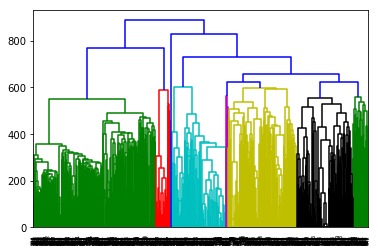

In [43]:
from scipy.cluster.hierarchy import average, fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
Z=average(matrix)
dn=hierarchy.dendrogram(Z)

In [23]:
i=0
x=[]
y=[]
while i<=250:
    x.append(i)
    i+=1
    a=fcluster(Z, i, criterion='distance')
    y.append(len(set(a)))

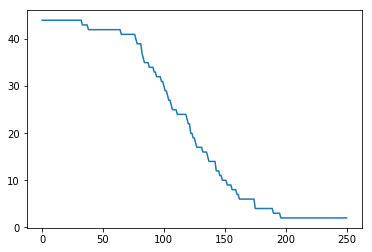

In [28]:
plt.plot(x,y)